# Project 3: Differential Drive (Part 2)

Due Date: Monday, February 17, 2020 @ 11:59 P.M.

Student #1 Name: Fei Ding

Student #2 Name: Zhen Jiang

In this project, you will perform wheel calibration to make the Duckiebot move in a desired trajectory. Then, you will perform experiments using the motion model. 

# Wheel Calibration
The motors used on the Duckiebots are called “Voltage-controlled motors”.  
This means that the velocity of each motor is directly proportional to the voltage it is subject to. (See Appendix for more information on PWM) Even though we use the same model of motor for left and right wheel, they are not exactly the same. In particular, every motor responds to a given voltage signal in a slightly different way.  
Similarly, the wheels that we are using look “identical”, but they might be slightly different.
If you drive the Duckiebot around in a straight line or a circle, you might notice that it doesn’t really go in a straight line when you command it to. This is due to those small differences between the motors and the wheels explained above.
Different motors can cause the left wheel and right wheel to travel at different speed even though the motors received the same command signal. Similarly, different wheels travel different distances even though the motors made the same rotation.
We can counter this behavior by calibrating the wheels. A calibrated Duckiebot sends two different signals to left and right motor such that the robot moves in a straight line when you command it to.

In this part, you will perform wheel calibration based on observation. This is to make the robot run in a (relatively) straight line so that you can use it for the experiments in the next part. 


## 1. Setup
First, you will have to download a new ros node from github.  
After you ssh into the Duckiebot (do not enter the docker image), run command
```
cd project3
git fetch
git checkout origin/master -- project3/src/project/packages/project3/src/move_in_line.py
```
This will clone the file that contains the source code for part 2. 

## 2. Calibration
Now you will perform calibration to make the wheels spin at the same rate.
The formula we use to calibrate is  

$v_{right} = (g+r)\cdot(v+\frac{1}{2}\omega l)$   
$v_{left} = (g-r)\cdot(v-\frac{1}{2}\omega l)$  

$v$ is the desired linear velocity. $\omega$ is the angular velocity and $l$ is the baseline. (length between the wheels) However, note that since we are only going to deal with straight line movement, $\omega$ is zero.  
You can perform calibration by adjusting the gain($g$) and trim($r$).  
Increasing and decreasing the trim (default value 0) will make one wheel move faster than the other wheel. Think about the behavior of the robot depending on different trim values.  
Changing the gain (default value 1) will make the robot move proportionally to $g$. In this test you will only change the trim.  

In the chrome shell, run 
```
docker run -it --name project3 \
-v /home/duckie/project3/project3/src/project/packages:/code/catkin_ws/src/project/packages \
--rm --net=host alexma3312/cs3630-project:v5 /bin/bash
```
to run the docker container.  
Then, run 
```
rosrun project3 move_in_line.py -hostname {HOSTNAME} -duration {RUNTIME} -vel {DESIRED VELOCITY} -trim {TRIM}
```
The ```{HOSTNAME}``` is like duckieXXX, XXX is the group number. 
In ```{DESIRED_VELOCITY} {TRIM}``` put your desired linear velocity and trim value.  
The robot will stop moving after the set `{RUNTIME}`.

__Calibrating the Duckiebot__  
Set the Duckiebot on a surface and run move_in_line.py (command above)  
Start with a velocity of your choice and trim value 0.  
Observe the movement of the robot. Does it move in a straight line?  
If it veers to the left or right, adjust the trim value accordingly. (ex. 0.1, -0.1...)  
Experiment until the robot moves in a relatively straight line. Ideally, the robot should drift less than 10 centimeters in a 2 meter run. Marking the straight-line trajectory with a tape (or just the start/finish line) might help you observe this more precisely. Here is a [video](https://youtu.be/syeoqHWyAI0) for your reference. 

>__*__ Conduct all the experiments (including the next part) in the same surface. The Duckiebot behaves differently in different surfaces. If you run it on a different surface, you will get different results. We recommend a smooth frictionless surface rather than carpets.

__Video of Calibrated Duckiebot__  
Take a video of your robot moving in a straight line. The video should be less then __10 seconds__ and the robot should move at least __1 meter__.  
Save the video as LASTNAME1_LASTNAME2_calibration.mp4
(other file formats are okay) 





# Probabilistic Modeling
The trim value you set in the calibration step ensures that the robot moves in a straight line. You will use this trim value for all the upcoming steps below.  
The motion model for the Duckiebot is given as  
$P(v_{observed}|v_l=1.0, v_r=1.0)$ for the desired velocity 1.0.  
In this part, you will calculate the (observed) velocity by measuring the distance the robot moved in a fixed time. Given the desired velocity $v=1.0$, you will measure the actual velocity of the robot. You will sample the velocity at least ten times and fit a Gaussian curve to the samples. You will do the same for $v=0.5$. 

You will need:
- A smooth surface (same surface you used for calibration) of at least 2 meters
- Measuring tool (ruler, measuring tape etc.)

## 1. Sampling
__Step 1__ Mark a starting point with a tape etc...  
__Step 2__ Place the center of the robot above the tape.  
__Step 3__ Run the robot for a fixed duration `{RUNTIME}`. Set the `{DESIRED VELOCITY}` to 1.0.  
TIP: we have observed that for velocity 1.0 and runtime 2.1 seconds, the robot moves a distance of about 1.5m.  
__Step 4__ After the robot stops, measure the distance traveled using a measuring tool and note it down.  
__Step 5__ Calculate the observed velocity in meters per second.  
Repeat step 2 to 5 at least __ten times__.  
Then, repeat step 2 to 5 at least ten times with __velocity 0.5__.

## 2. Plotting 
In this step, you will fit two Gaussian curves for each velocities 1.0 and 0.5.  
The final plot should look something like this:  
![gaussian](https://i.imgur.com/eOFyxvl.png)  
The gaussian curves may appear differently in your experiment!  
Include a title for a graph. Label the x and y axis.  
Please also include a legend to denote the different velocities.

Some useful libraries are provided below. You are free to use any other libraries runnable on colab.   
How does the two curves look like? Why are the curves different/similar? You will answer these questions in the reflection. 

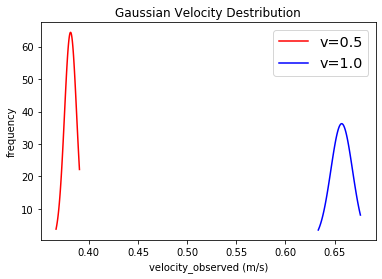

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

#######TODO: Plotting Code Here#######
t = 2.1
d1 = [
      0.77,
      0.80,
      0.82,
      0.81,
      0.81,
      0.80,
      0.80,
      0.79,
      0.80,
      0.81
]
v1 = np.array(d1) / t
d2 = [1.40,
      1.38,
      1.40,
      1.40,
      1.42,
      1.37,
      1.34,
      1.39,
      1.40,
      1.38,
      1.38,
      1.36,
      1.37,
      1.33,
      1.38
  ]
v2 = np.array(d2) / t
m1 = np.mean(v1)
m2 = np.mean(v2)
std_dev1 = np.std(v1)
std_dev2 = np.std(v2)

x1 = np.linspace(np.min(v1), np.max(v1), 100)
x2 = np.linspace(np.min(v2), np.max(v2), 100)

y1 = scipy.stats.norm.pdf(x1,m1,std_dev1)
y2 = scipy.stats.norm.pdf(x2,m2,std_dev2)

plt.plot(x1,y1,color='red',label='v=0.5')
plt.plot(x2,y2,color='blue',label='v=1.0')

legend = plt.legend(loc='upper right', fontsize='x-large')

plt.title('Gaussian Velocity Destribution')
plt.xlabel('velocity_observed (m/s)')
plt.ylabel('frequency')

plt.show()


## 3. Reflection [50 points]

Answer the questions in the proj3_part2_report_template.pptx . 
You can find the pptx file in the files tab on Canvas.  
Save the file as a PDF and rename it to LASTNAME1_LASTNAME2_reflection2.pdf


## Rubric

- 20 pts: Wheel Calibration
- 30 pts: Probabilistic Modeling
- 50 pts: Reflection Writeup

## Submission Details
### Deliverables

A zip file named {LASTNAME1_LASTNAME2_GROUPNUMBER}.zip with the following files:
- project3-2.py - convert your colab ipynb file to py format. (File -> Download as `.py`)
- LASTNAME1_LASTNAME2_calibration.mp4 - Video of the calibrated Duckiebot running in a straight line.
- LASTNAME1_LASTNAME2_reflection2.pdf: The reflection slides converted to PDF form.  
__Include the files from part 1. Please take caution with the naming.__ 
- project3-1.py
- LASTNAME1_LASTNAME2_circle.mp4 
- LASTNAME1_LASTNAME2_reflection1.pdf
Submit the zip file to Canvas.  
__Only one person per group should upload the submission.__

# Appendix: Pulse Width Modulation (PWM) 
The speed of the motor varies with the voltage levels. A maximum of 5V results in highest speed the motor can rotate. However, digital circuits(e.g Raspberry Pi) cannot create voltage levels. So, the Duckiebot's motor speed is controlled with PWM(Pulse Width Modulation).  
![pwm](https://i.imgur.com/Iw68IQK.gif)  
A Pulse Width Modulation (PWM) Signal is a method for generating an analog signal using a digital source. A PWM signal consists of two main components that define its behavior: a duty cycle and a frequency. The duty cycle describes the amount of time the signal is in a high (on) state as a percentage of the total time of it takes to complete one cycle. The frequency determines and therefore how fast it switches between high and low states. By cycling a digital signal off and on at a fast enough rate, and with a certain duty cycle, the output will appear to behave like a constant voltage analog signal when providing power to devices.  

To create a 3V signal given a digital source that can be either high (on) at 5V, or low (off) at 0V, you can use PWM with a duty cycle of 60% which outputs 5V 60% of the time. If the digital signal is cycled fast enough, then the voltage seen at the output appears to be the average voltage. If the digital low is 0V (which is usually the case) then the average voltage can be calculated by taking the digital high voltage multiplied by the duty cycle, or 5V x 0.6 = 3V. Selecting a duty cycle of 80% would yield 4V, 20% would yield 1V, and so on.  

